# Laboratorio 1 - Regresi√≥n

 Estudiante 1: Mar√≠a Alejandra Pinz√≥n Roncancio - 202213956

 Estudiante 2: Ignacio Chaparro - 202220577

Estudiante 3: Mateo Lopez - 202220119

# **1. Descripci√≥n del entendimiento de datos**

### 1.1 Descripci√≥n de las variables de los datos

Primero, vamos a describir las variables que se tienen en el dataset, para poder entender la informaci√≥n que se tiene y poder utilizarla para el modelado.

- **`objid`**: Identificador √∫nico de cada medida, no tiene ninguna relevancia para el objetivo buscado as√≠ que no ser√° de importancia como variable para la etapa de modelado
- **`ra`**: Ubicaci√≥n del objeto en su componente de ascensi√≥n recta de coordenada celeste. los valores posibles est√°n entre 10 y 250.
- **`dec`**: Ubicaci√≥n del objeto en su componente de declinaci√≥n de coordenada celeste.
- **`u`**: Magnitud del objeto capturada en el filtro ultravioleta. Tiene que ser un valor positivo.
- **`g`**: Magnitud del objeto capturada en el filtro verde. Valor mayor a 0.
- **`r`**: Magnitud del objeto capturada en el filtro rojo. Valor mayor a 0.
- **`z`**: Magnitud del objeto capturada en el filtro casi-infrarrojo. Valor mayor a 0.
- **`i`**: Magnitud del objeto capturada en el filtro infrarrojo. Valor mayor a 0.
- **`run`**: N√∫mero de observaci√≥n realizada por el telescopio.
- **`camcol`**: Columna de la c√°mara en la que se registr√≥ el objeto.
- **`field`**: Secci√≥n de la columna de la c√°mara en la que se registr√≥ el objeto.
- **`score`**: Valor de calidad de la observaci√≥n en la secci√≥n de la columna (field). Es un n√∫mero entre 0 y 1.
- **`clean`**: Flag que indica si la fotometr√≠a del objeto es confiable. (1) si lo es (0) en caso de que se sospeche irregularidades con la fotometr√≠a.
- **`class`**: Tipo de objeto registrado: Estrella (STAR) o Galaxia (GALAXY) o Cuasar (QSO)
- **`redshift`**: Valor de corrimiento al rojo obtenido del objeto calculado por espectroscop√≠a. *Es la variable objetivo.*
- **`mjd`**: D√≠a juliano en que se registr√≥ el objeto.
- **`rowv`**: Velocidad horizontal (fila) del objeto en grados/d√≠a.
- **`colv`**: Velocidad vertical (columna) del objeto en grados/columna.

### **Clasificaci√≥n:**

- **Num√©ricas:** `ra`, `dec`, `u`, `g`, `r`, `z`, `i`, `score`, `mjd`, `rowv`, `colv`
- **Categ√≥ricas:** `objid`, `run`, `camcol`, `field`, `class`
- **Booleanas:** `clean`
- **Variable objetivo:** `redshift`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import joblib

### 1.2 Carga de datos

In [2]:
data_path = "Regresion_train_data.csv"
dataframe_train = pd.read_csv(data_path)

In [3]:
dataframe_train.describe()

objid           ra          dec            u            g  \
count  4.000000e+03  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1.237649e+18   185.523295     0.248959    18.609049    17.363397   
std    4.244222e+11    41.689446     2.001075     0.839431     0.950964   
min    1.237646e+18    10.469743    -1.252763    13.551780    12.974870   
25%    1.237649e+18   162.474666    -0.631824    18.170375    16.796110   
50%    1.237649e+18   195.815451     0.053336    18.843745    17.472525   
75%    1.237649e+18   214.348425     0.593396    19.261563    17.997818   
max    1.237650e+18   249.758313    13.854010    19.599750    22.497450   

                 r            i            z          run      camcol  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.00000   
mean     16.839856    16.597712    16.439392   743.829000     3.37625   
std       1.055343     1.141252     1.190502    98.865936     1.69909   
min      12.362850    12.010790    11.799530   211.000000     1.00000   
25%      16.190785    15.870782    15.628205   752.000000     2.00000   
50%      16.850835    16.571195    16.402665   756.000000     3.00000   
75%      17.506640    17.258833    17.147037   756.000000     5.00000   
max      22.265960    28.179630    20.847690  1035.000000     6.00000   

             field        score        clean     redshift           mjd  \
count  4000.000000  4000.000000  4000.000000  4000.000000   4000.000000   
mean    419.602000     0.851765     0.895500     0.134015  52957.124750   
std     167.162063     0.071311     0.305946     0.379742   1601.148131   
min      19.000000     0.301912     0.000000    -0.003322  51608.000000   
25%     311.000000     0.836866     1.000000     0.000106  51821.000000   
50%     434.000000     0.860675     1.000000     0.032038  51986.000000   
75%     527.000000     0.879834     1.000000     0.086479  54468.000000   
max     812.000000     0.961145     1.000000     4.192597  58932.000000   

              rowv         colv  
count  4000.000000  4000.000000  
mean      0.000218    -0.000090  
std       0.008794     0.007457  
min      -0.264516    -0.168807  
25%      -0.001212    -0.001609  
50%       0.000322     0.000125  
75%       0.001698     0.001672  
max       0.181871     0.128814

## 1.3 Analisis del dataframe

El perfilamiento de datos es el proceso mediante el cual se examinan las caracter√≠sticas y calidad de un conjunto de datos para comprender su estructura, identificar posibles problemas y definir las transformaciones necesarias antes de construir un modelo predictivo. En esta etapa, se realiza un primer an√°lisis del `dataframe_train` para obtener una visi√≥n inicial de las variables y su comportamiento, as√≠ como para decidir qu√© pasos seguir en la preparaci√≥n de los datos.

- N√∫mero total de registros: 4000 en todas las columnas, lo que indica que no hay valores nulos.
- Distribuci√≥n de las variables: Se observan diferentes escalas y magnitudes entre las variables, lo que sugiere la necesidad de una estandarizaci√≥n para el modelado.



### **An√°lisis de variables num√©ricas**

 **Coordenadas celestes (ra, dec)**
- **`ra` (ascensi√≥n recta)**: Rango entre 10.47 y 249.76, con una media de 185.52 y una desviaci√≥n est√°ndar de 41.69.  
  - **Posible transformaci√≥n**: Conversi√≥n a coordenadas cartesianas (x, y, z) para reflejar de mejor manera su relaci√≥n espacial.  
- **`dec` (declinaci√≥n)**: Rango entre -1.25 y 13.85, con una media de 0.24 y una desviaci√≥n est√°ndar de 2.00.  
  - **Observaci√≥n**: Presencia de valores negativos, lo cual es normal para esta variable.

---

 **Magnitudes fotom√©tricas (u, g, r, i, z)**
- **Rangos**: Se encuentran en el espectro positivo.  
- **Valores extremos**: `i` y `z` tienen valores m√°ximos superiores al resto, lo que podr√≠a afectar el modelo si no se estandarizan.

---

 **Tiempo de observaci√≥n (mjd)**
- **Rango**: Desde 51608 hasta 58932, con una media de 52957.12 y una desviaci√≥n est√°ndar de 1601.15.  
  - **Riesgo**: **Sesgo temporal** debido a la naturaleza creciente de la fecha.  
  - **Transformaci√≥n necesaria**: Convertir a d√≠as secuenciales y extraer caracter√≠sticas c√≠clicas del mes.

---

 **Velocidades (rowv, colv)**
- Valores cercanos a cero, pero con algunos extremos negativos y positivos.  

---

### **An√°lisis de variables categ√≥ricas**

- **`class`**: Tiene tres posibles valores (`STAR`, `GALAXY`, `QUASAR`), pero se observa inconsistencia en su representaci√≥n (`S` y `STAR`).  
  - **Transformaci√≥n requerida**: Aplicar `OneHotEncoding` y eliminar una categor√≠a para evitar multicolinealidad.

- **`clean`**: Variable booleana que marca registros con posibles problemas en la fotometr√≠a.  

---

###  **An√°lisis de calidad de los datos**
En pasos posteriores se analizaran los siguientes:
- **Duplicados**
- **Valores nulos** 
- **Outliers**

---

###  **Conclusion del perfilamiento inicial**

 **Transformaciones necesarias**:  
   - `mjd`: Conversi√≥n a d√≠as secuenciales y extracci√≥n de caracter√≠sticas c√≠clicas.  
   - `ra` y `dec`: Conversi√≥n a coordenadas cartesianas.  
   - `class`: Aplicar `OneHotEncoding` con eliminaci√≥n de una categor√≠a.  
   - Estandarizaci√≥n de variables num√©ricas.



## **2. Descripci√≥n del proceso de selecci√≥n de variables**

### Elecci√≥n de variables importantes para el modelo

 ### 2.1 Primer selecci√≥n de variables
 
 - La variable objetivo es `redshift`, por lo que se debe seleccionar las variables que tengan una correlaci√≥n con esta variable.
 - Para esto, vamos a seleccionar las variables num√©ricas de los datos. Desde el primer instante no se va a considerar en la selecci√≥n de variables las variables como `run`, `field`, `camcol`, que, aunque son variables num√©ricas, son simplemente identificadores y no tienen una correlaci√≥n con la variable objetivo. Tambi√©n del dataset se omite la variable `objectid` ya que no es una variable relevante para el modelado. 
- Incluiremos las variables cualitativas, la variable `class` sera considerada para el analisis posterior, ya que no es una variable num√©rica.
- Se tiene en cuenta que la variable `clean` es una variable booleana, esta puede usarse para este paso, ya que una variable booleana puede representar la presencia o ausencia de una caracter√≠stica importante en los datos. 

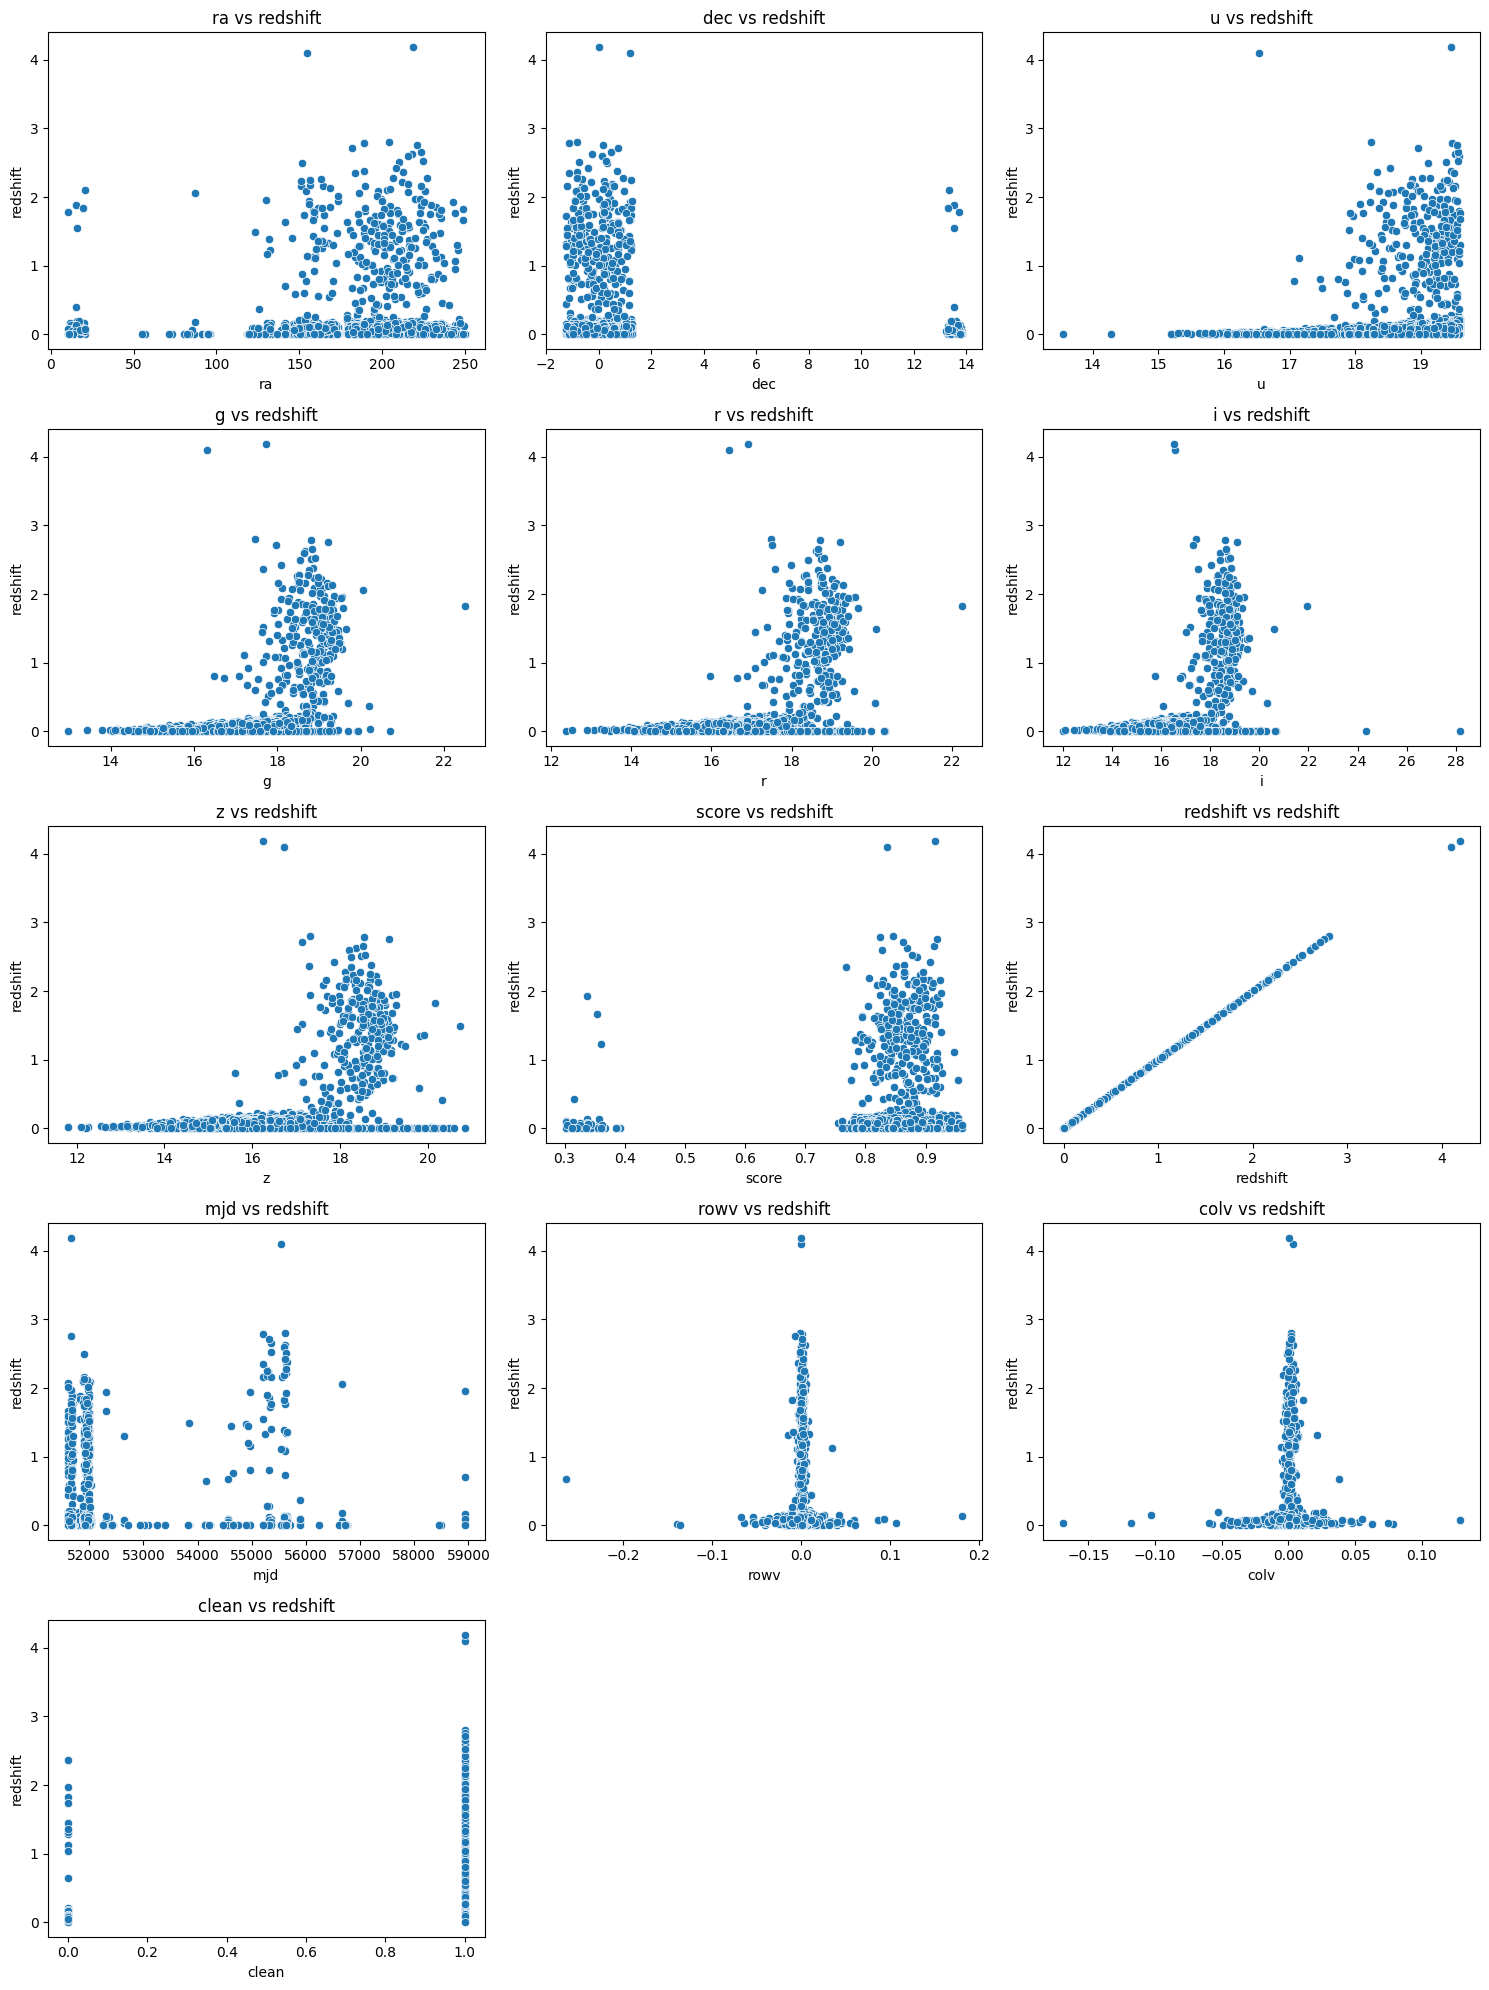

In [4]:
# Score es un variable booleana que va de 0 a 1
# Clean es booleana que explica irregularidades en la foto

variables_cuantitativas = ["ra", "dec", "u", "g", "r", "i", "z","score", "redshift", "mjd", "rowv", "colv", "clean"]
# Crear una figura con subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20)) # Aumentado a 5x3 para tener 15 subplots
axes = axes.ravel()

# Crear scatter plots para cada variable
for idx, variable in enumerate(variables_cuantitativas):
    sns.scatterplot(
        data=dataframe_train,
        x=variable,
        y='redshift',
        ax=axes[idx]
    )
    axes[idx].set_title(f'{variable} vs redshift')

# Eliminar los subplots vac√≠os
for idx in range(len(variables_cuantitativas), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

 De las graficas se puede concluir lo siguiente:
 - Las variables a incluir en el siguiente analisis son:
     - `u`, `g`, `r`, `i`, `z` . Se observa cierta proporcionalidad entre redshift y estas variables.
     - `mjd` ( que puede requerir una transformaci√≥n, posteriormente se explicar√° el porque)
     - `ra`, `dec` (que pueden requerir una transformaci√≥n, posteriormente se explicar√° el porque)
 
 - La variables a descartar son:
     - `score`, `rowv`, `colv`, `clean`. No se observa proporcionalidad entre redshift y estas variables, adem√°s no hay razones para considerar que estas variables sean relevantes para el modelo.
 
 ### 2.2 Segunda selecci√≥n de variables - An√°lisis de correlaci√≥n


 Entonces, como se puede evidenciar una tendencia cuando se analizan las graficas de las variables `i`, `r`, `z`, `g` y `u`. Podria empezar a sospecharse comportamientos proporcionales entre redshift y estas variables. Ahora con las variables que se van a utilizar, se puede realizar un mapa de calor para ver la correlaci√≥n entre las variables. Esto, con el fin de identificar y descartar variables que no aportan informaci√≥n relevante para el modelo dado que pueden ser colineales.


<Axes: title={'center': 'Correlaci√≥n entre variables'}>

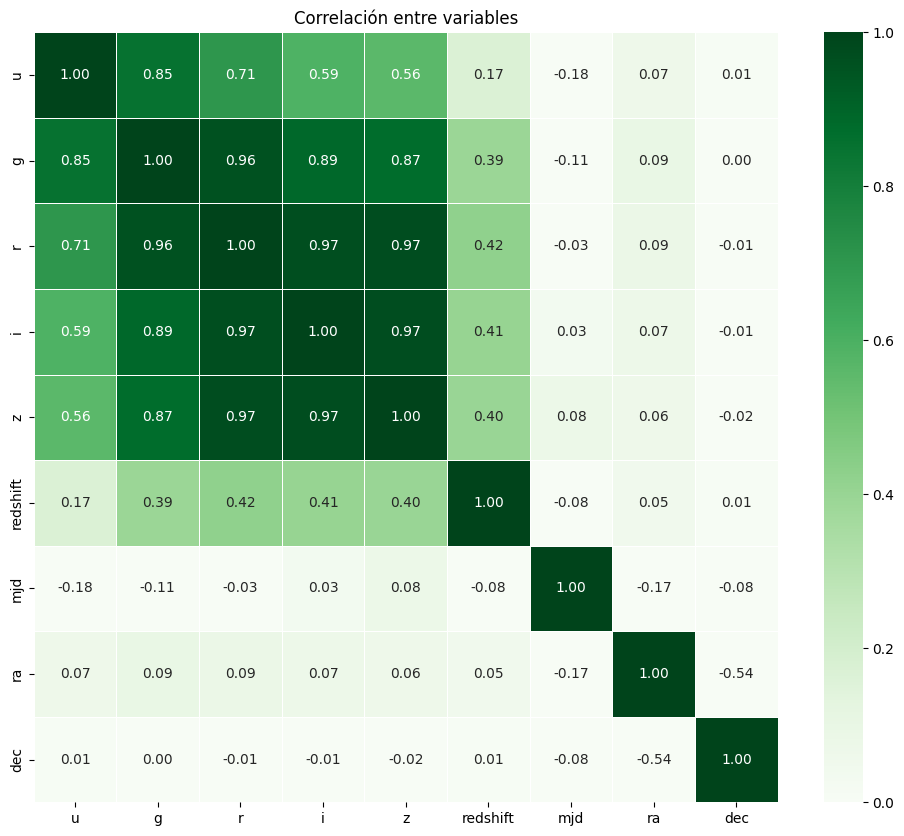

In [5]:
variables_cuantitativas_2 = ['u', 'g', 'r', 'i', 'z', 'redshift', 'mjd', 'ra', 'dec']

plt.figure(figsize=(12, 10))
plt.title('Correlaci√≥n entre variables')
sns.heatmap(
    dataframe_train[variables_cuantitativas_2].corr(), 
    cmap="Greens", 
    vmin=0, 
    vmax=1, 
    annot=True, 
    fmt=".2f",  
    linewidths=0.5,  
    cbar=True
)

 Al observar este mapa de calor, podemos ver que las variables `u`, `g`, `r`, `i` y `z` son las que mayor correlaci√≥n tienen con nuestra variable objetivo `redshift`.
 
 Sin embargo, se puede observar que las variables `u`, `g`, `r`, `i` y `z` son altamente colineales entre si, por lo que se va a seleccionar solo dos de ellas para el modelo.
 
 - Debido a los valores cercanos que tienen las variables `g`, `r`, `i` y `z`, se va a seleccionar `r`, que tiene una correlaci√≥n m√°s alta con `redshift` que las otras variables.
 - Ahora vamos a analizar la colinealidad entre `r` y el resto de las variables.
   - `u` y `r` tienen una correlaci√≥n de 0.70
   - `g` y `r` tienen una correlaci√≥n de 0.96
   - `i` y `r` tienen una correlaci√≥n de 0.97
   - `z` y `r` tienen una correlaci√≥n de 0.97
   
   - Se elegir√° `g` debido a que su correlaci√≥n con `r` es la segunda m√°s baja y sigue teniendo una correlaci√≥n m√°s alta con redshift.

   Una vez seleccionadas las variables `g` y `r`, vamos a analizar que ocurrio con las otras variables `mjd`, `ra`, `dec`, `class`, antes de pasar a la estandarizaci√≥n de las variables.


 #### 2.3 Transformaci√≥n de la variable mjd
 La variable `mjd` representa el d√≠a juliano **modificado** en que se registr√≥ la observaci√≥n del objeto astron√≥mico. Su naturaleza y posible impacto en la regresi√≥n requieren una evaluaci√≥n detallada. 
 En la fase del entendimiento de los datos, se identifico que es una variable grande en comparacion con otras variables en el dataset. Entonces se investigo a que hace referencia esta variable y se encontro un posible sesgo temporal. El sesgo temporal en `mjd` ocurre porque sus valores aumentan continuamente con el tiempo, lo que puede hacer que el modelo aprenda tendencias artificiales en lugar de relaciones reales con `redshift`. Adem√°s, su escala grande puede afectar la estabilidad num√©rica y dificultar la interpretaci√≥n. Para corregirlo, se convierte en d√≠as secuenciales desde un m√≠nimo y se extraen meses en formato c√≠clico (sin y cos) para capturar patrones estacionales sin inducir dependencia temporal. 

 Para manejar este sesgo temporal, se realizaron las siguientes transformaciones:
 1. Se convirti√≥ mjd a d√≠as secuenciales comenzando desde 0, restando el valor m√≠nimo de mjd del conjunto de datos
 2. Se convirti√≥ mjd a fechas reales usando como √©poca el 17 de noviembre de 1858
 3. Se extrajeron los meses de las fechas y se transformaron en caracter√≠sticas c√≠clicas usando funciones seno y coseno
 Esto permite capturar patrones estacionales mientras se mantiene la naturaleza c√≠clica de los meses


In [6]:
# Convertir mjd a d√≠as secuenciales y caracter√≠sticas c√≠clicas de mes
mjd_values = dataframe_train['mjd'].values

# Convertir a d√≠as secuenciales empezando desde 0
min_mjd = mjd_values.min()
sequential_days = mjd_values - min_mjd

# Convertir mjd a datetime para obtener informaci√≥n del mes
# La √©poca mjd comienza el 17 de noviembre de 1858
mjd_epoch = pd.Timestamp('1858-11-17')
dates = pd.to_datetime(mjd_values, unit='D', origin=mjd_epoch)

# Extraer mes y convertir a caracter√≠sticas c√≠clicas
months = dates.month
month_sin = np.sin(2 * np.pi * months / 12)
month_cos = np.cos(2 * np.pi * months / 12)

# Agregar nuevas caracter√≠sticas al dataframe
dataframe_train['mjd_sequential'] = sequential_days
dataframe_train['month_sin'] = month_sin
dataframe_train['month_cos'] = month_cos

# Mostrar las primeras filas de los datos transformados
print("Primeras 5 filas de los datos mjd transformados:")
print(dataframe_train[['mjd', 'mjd_sequential', 'month_sin', 'month_cos']].head())

Primeras 5 filas de los datos mjd transformados:
     mjd  mjd_sequential  month_sin  month_cos
0  54140            2532   0.866025   0.500000
1  51955             347   0.866025   0.500000
2  51913             305   0.500000   0.866025
3  51959             351   0.866025   0.500000
4  54562            2954   0.866025  -0.500000


#### 2.4 Transformaci√≥n de las variables ra y dec

Ahora, la transformaci√≥n de ra (ascensi√≥n recta) y `dec (declinaci√≥n) puede ser √∫til porque estos valores representan coordenadas angulares en la esfera celeste, y tratarlas como variables num√©ricas directas puede introducir sesgos o distorsiones en analisis de que variables son relevantes para el modelo.

 Para manejar esto, convertiremos las coordenadas esf√©ricas (ra, dec) a coordenadas cartesianas (x, y, z). Esto se hace mediante:
 1. Convertir ra y dec de grados a radianes 
 2. Calcular las coordenadas cartesianas usando las f√≥rmulas:
    - x = cos(dec) * cos(ra)
    - y = cos(dec) * sin(ra) 
    - z = sin(dec)

 Esta transformaci√≥n nos permite representar la posici√≥n de los objetos en un espacio tridimensional cartesiano, lo que puede ser m√°s √∫til para el an√°lisis y modelado.


In [7]:
# Convertir RA y Dec de grados a radianes
ra_rad = np.radians(dataframe_train['ra'])
dec_rad = np.radians(dataframe_train['dec'])

# Calcular coordenadas cartesianas
dataframe_train['x_cord'] = np.cos(dec_rad) * np.cos(ra_rad)
dataframe_train['y_cord'] = np.cos(dec_rad) * np.sin(ra_rad)
dataframe_train['z_cord'] = np.sin(dec_rad)

# Mostrar 5 filas del dataframe con las nuevas coordenadas cartesianas
print("\nPrimeras 5 filas con las coordenadas cartesianas:")
print(dataframe_train[['ra', 'dec', 'x_cord', 'y_cord', 'z_cord']].head())



Primeras 5 filas con las coordenadas cartesianas:
           ra       dec    x_cord    y_cord    z_cord
0  185.574486  0.701402 -0.995196 -0.097132  0.012241
1  203.801841 -0.853906 -0.914845 -0.403530 -0.014903
2  160.034264 -0.421626 -0.939872  0.341449 -0.007359
3  200.807373 -0.682024 -0.934714 -0.355202 -0.011903
4  189.792404 -1.001480 -0.985280 -0.170053 -0.017478


### 2.5 Modificaci√≥n de la columna 'class'

Revisando los datos en la columna 'class', se puede ver que se utilizan notaciones distintas para las categor√≠as de los objetos. por ejemplo, 'S' y 'STAR' son la misma categor√≠a, 'G' y 'GALAXY' son la misma categor√≠a, 'QSO' y 'QUASAR' son la misma categor√≠a. Esto ocurre repetidas veces en el dataset, por lo que no es un caso en el que se deba eliminar datos, sino que se debe mantener la consistencia de los datos estableciendo una notaci√≥n com√∫n para todas las categor√≠as.


In [8]:
uniques = dataframe_train['class'].unique()
uniques

array(['STAR', 'GALAXY', 'QSO', 'S', 'QUASAR', 'G'], dtype=object)

Se puede ver la existencia de valores no estandarizados en la columna 'class', por lo que se procede a reemplazar S por Star, QSO por Quasar y G por Galaxy para mantener esta consistencia de datos

In [9]:
# Estandarizar las categor√≠as de class
dataframe_train['class'] = dataframe_train['class'].replace({
    'S': 'STAR', 
    'STAR': 'STAR',
    'G': 'GALAXY',
    'GALAXY': 'GALAXY', 
    'QSO': 'QUASAR',
    'QUASAR': 'QUASAR'
})

# Verificar las categor√≠as √∫nicas despu√©s de la estandarizaci√≥n
uniques = dataframe_train['class'].unique()
uniques

array(['STAR', 'GALAXY', 'QUASAR'], dtype=object)


### 2.6 Transformaci√≥n de la variable class

Ya que no se pueden procesar las variables cualitativas directamente, como la variable `class`, se procede a codificarlas usando one-hot encoding. Al representar `class` con valores binarios, el modelo puede aprender c√≥mo cada tipo de objeto astron√≥mico afecta la variable objetivo.
Para este paso seutiliza One-Hot Encoding para y asi transformar la variable categ√≥rica `class` en un formato num√©rico.

In [10]:
# Aplicar One-Hot Encoding a la columna 'class'
encoder = OneHotEncoder(sparse_output=False, drop=None)
class_encoded = encoder.fit_transform(dataframe_train[['class']])
class_encoded_df = pd.DataFrame(class_encoded, columns=encoder.get_feature_names_out(['class']))

# Concatenar el dataframe original con las nuevas columnas codificadas
dataframe_train_encoded = pd.concat([dataframe_train, class_encoded_df], axis=1)

# Obtener los nombres de las columnas codificadas
class_columns = encoder.get_feature_names_out(['class'])

# Mostrar solo 5 filas para mejor visualizaci√≥n
# Se accede usando ['class'] + list(class_columns) para mostrar:
# 1. La columna original 'class' antes de la codificaci√≥n
# 2. Las nuevas columnas generadas por el one-hot encoding (class_GALAXY, class_QUASAR, etc)
print("\nPrimeras 5 filas despu√©s de la codificaci√≥n One-Hot:")
print(dataframe_train_encoded[['class'] + list(class_columns)].head())



Primeras 5 filas despu√©s de la codificaci√≥n One-Hot:
    class  class_GALAXY  class_QUASAR  class_STAR
0    STAR           0.0           0.0         1.0
1  GALAXY           1.0           0.0         0.0
2  GALAXY           1.0           0.0         0.0
3  GALAXY           1.0           0.0         0.0
4    STAR           0.0           0.0         1.0


Ahora, tenemos tres nuevas variables que representan el tipo de objeto registrado, y analizando las nuevas columnas se puede notar que estas tres columnas no son independientes entre s√≠, ya que la clase original ten√≠a solo tres posibles valores mutuamente excluyentes. Es decir, si sabemos el valor de dos de estas columnas, el tercero se puede inferir autom√°ticamente. Eliminar una columna evita redundancia y problemas de colinealidad en la regresi√≥n. En este caso, dejando `class_GALAXY` y `class_STAR`, el modelo a√∫n puede determinar si un objeto es un quasar cuando ambas toman el valor 0.


Entonces, luego de un analisis de correlaci√≥n y de la transformaci√≥n de las variables, finalmentese puede concluir que las variables que se van a utilizar son:
- `r`
- `g`
- `class_GALAXY`
- `class_STAR`
- `mjd_sequential`
- `month_sin`
- `month_cos`
- `x_cord`
- `y_cord`
- `z_cord`

El siguiente paso es estandarizar las variables  `r`, `g` , `mjd_sequential`, `month_sin`, `month_cos`, `x_cord`, `y_cord`, `z_cord`, para que el modelo pueda entrenar de manera correcta.

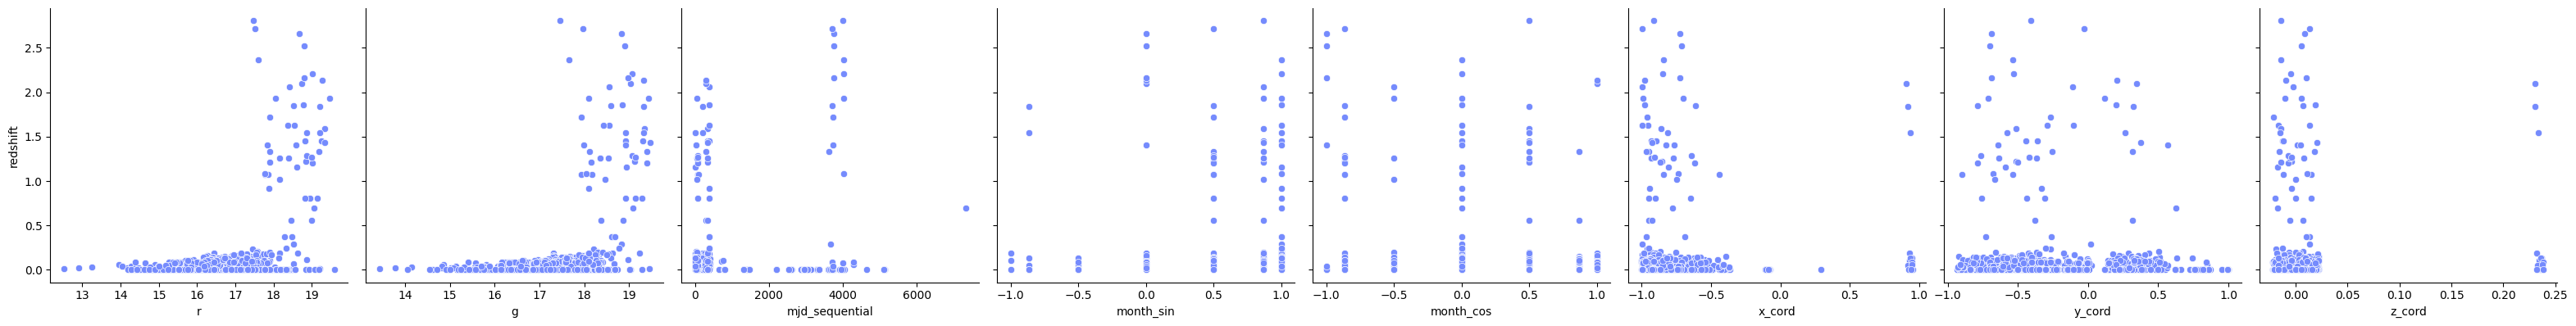

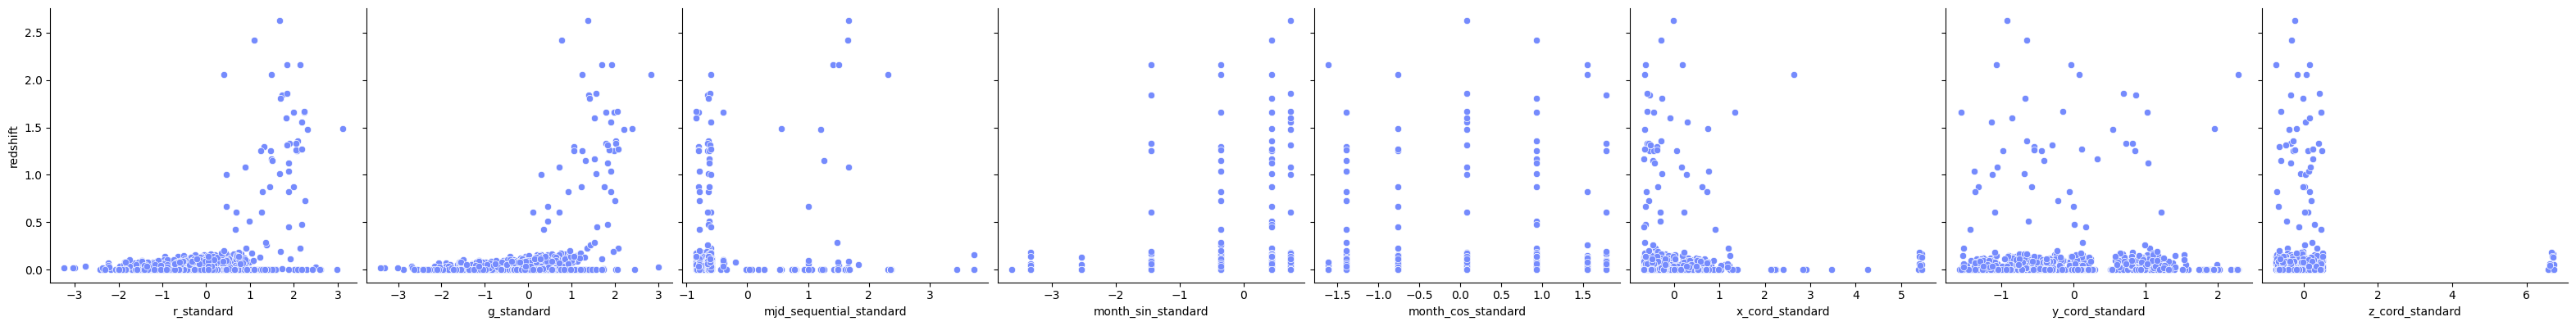

In [11]:
scaler = StandardScaler()

# Aplicar estandarizaci√≥n a las variables seleccionadas y actualizar el DataFrame
variables_a_estandarizar = ['r', 'g', 'mjd_sequential', 'month_sin', 'month_cos', 'x_cord', 'y_cord', 'z_cord']
variables_estandarizadas = [var + '_standard' for var in variables_a_estandarizar]

dataframe_train_encoded[variables_estandarizadas] = scaler.fit_transform(dataframe_train_encoded[variables_a_estandarizar])

# Visualizar la distribuci√≥n antes y despu√©s de la estandarizaci√≥n
sns.pairplot(
    dataframe_train_encoded.sample(frac=0.2),
    height=4,
    y_vars="redshift",
    x_vars=variables_a_estandarizar,  # Variables originales
    kind="scatter",
    plot_kws={'color': '#758BFD'}
)

sns.pairplot(
    dataframe_train_encoded.sample(frac=0.2),
    height=4,
    y_vars="redshift",
    x_vars=variables_estandarizadas,  # Variables estandarizadas
    kind="scatter", 
    plot_kws={'color': '#758BFD'}
)




In [12]:
pd.set_option('display.max_columns', None)
dataframe_train_encoded.head()


objid          ra       dec         u         g         r  \
0  1237648722306924571  185.574486  0.701402  19.11034  17.62099  17.03464   
1  1237648720167436418  203.801841 -0.853906  18.90957  17.62940  17.01465   
2  1237648720685105352  160.034264 -0.421626  19.26340  17.67693  16.82551   
3  1237648703510937836  200.807373 -0.682024  18.82022  17.77765  17.38575   
4  1237648720161275992  189.792404 -1.001480  18.91391  19.05355  19.46278   

          i         z  run  camcol  field     score  clean   class  \
0  16.82993  16.71711  756       5    466  0.864145      1    STAR   
1  16.62059  16.35239  756       1    588  0.816541      1  GALAXY   
2  16.42307  16.13864  756       2    295  0.870381      1  GALAXY   
3  17.11128  16.93540  752       2    382  0.867801      1  GALAXY   
4  19.75660  20.09613  756       1    494  0.833824      1    STAR   

       redshift    mjd      rowv      colv  mjd_sequential  month_sin  \
0  8.780529e-05  54140  0.002418  0.001363            2532   0.866025   
1  8.619995e-02  51955  0.008650  0.007056             347   0.866025   
2  1.330486e-01  51913  0.003938 -0.002028             305   0.500000   
3  8.636355e-02  51959  0.001839  0.001160             351   0.866025   
4 -4.090000e-08  54562  0.001929 -0.000465            2954   0.866025   

   month_cos    x_cord    y_cord    z_cord  class_GALAXY  class_QUASAR  \
0   0.500000 -0.995196 -0.097132  0.012241           0.0           0.0   
1   0.500000 -0.914845 -0.403530 -0.014903           1.0           0.0   
2   0.866025 -0.939872  0.341449 -0.007359           1.0           0.0   
3   0.500000 -0.934714 -0.355202 -0.011903           1.0           0.0   
4  -0.500000 -0.985280 -0.170053 -0.017478           0.0           0.0   

   class_STAR  r_standard  g_standard  mjd_sequential_standard  \
0         1.0    0.184592    0.270910                 0.738859   
1         0.0    0.165648    0.279755                -0.625957   
2         0.0   -0.013595    0.329742                -0.652192   
3         0.0    0.517332    0.435669                -0.623459   
4         1.0    2.485686    1.777527                 1.002453   

   month_sin_standard  month_cos_standard  x_cord_standard  y_cord_standard  \
0            0.441945            0.934106        -0.646513         0.096622   
1            0.441945            0.934106        -0.394727        -0.512090   
2           -0.355059            1.555544        -0.473149         0.967941   
3            0.441945            0.934106        -0.456987        -0.416078   
4            0.441945           -0.763692        -0.615439        -0.048247   

   z_cord_standard  
0         0.229229  
1        -0.554513  
2        -0.336688  
3        -0.467904  
4        -0.628870

# **3. Descripci√≥n e implementaci√≥n del proceso de preparaci√≥n de datos**
### 3.1 Completitud de los Datos


In [13]:
dataframe_train_encoded.isnull().sum() / dataframe_train.shape[0]

objid                      0.0
ra                         0.0
dec                        0.0
u                          0.0
g                          0.0
r                          0.0
i                          0.0
z                          0.0
run                        0.0
camcol                     0.0
field                      0.0
score                      0.0
clean                      0.0
class                      0.0
redshift                   0.0
mjd                        0.0
rowv                       0.0
colv                       0.0
mjd_sequential             0.0
month_sin                  0.0
month_cos                  0.0
x_cord                     0.0
y_cord                     0.0
z_cord                     0.0
class_GALAXY               0.0
class_QUASAR               0.0
class_STAR                 0.0
r_standard                 0.0
g_standard                 0.0
mjd_sequential_standard    0.0
month_sin_standard         0.0
month_cos_standard         0.0
x_cord_s

### 3.2 Eliminaci√≥n de Datos Duplicados 
A continuaci√≥n, se eliminan los datos duplicados del dataframe. Esto para evitar sesgo en el entrenamiento y evaluaci√≥n incorrecta del modelo.


Luego de este paso Se puede ver que no hay datos nulos en el dataframe.

In [14]:
duplicados = dataframe_train_encoded.duplicated().sum()
duplicados

np.int64(17)

Se ha identificado la existencia de 17 datos duplicados en el dataframe, por lo que se procede a eliminarlos.


In [15]:
dataframe_train_encoded = dataframe_train_encoded.drop_duplicates().reset_index(drop=True)
duplicados = dataframe_train_encoded.duplicated().sum()
duplicados


np.int64(0)

## **4. Construcci√≥n del modelo de regresi√≥n lineal**

Despu√©s del an√°lisis de correlaci√≥n y colinealidad, se han seleccionado las siguientes variables para el modelo de regresi√≥n:

- `r_standard`
- `g_standard`
- `class_GALAXY`
- `class_STAR`
- `mjd_sequential_standard`
- `month_sin_standard`
- `month_cos_standard`
- `x_cord_standard`
- `y_cord_standard`
- `z_cord_standard`

Estas variables permitir√°n construir un modelo eficiente y evitar problemas de redundancia en la predicci√≥n.

Primero, debemos particionar el conjunto de datos entre datos de entrenamiento y datos de validaci√≥n. Vamos a dividir los datos en conjunto de entrenamiento y prueba (X_train, X_test, y_train, y_test) con una proporci√≥n de 80% para entrenamiento y 20% para prueba.

In [16]:


y = dataframe_train_encoded['redshift']

# Seleccionar solo las variables que vamos a usar en el modelo
variables_modelo = ["r_standard","g_standard",'class_GALAXY','class_STAR','mjd_sequential_standard','month_sin_standard','month_cos_standard','x_cord_standard','y_cord_standard','z_cord_standard']
X = dataframe_train_encoded[variables_modelo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3186, 10), (797, 10), (3186,), (797,))

In [17]:
X_train.head()

r_standard  g_standard  class_GALAXY  class_STAR  \
557    -1.730057   -1.690039           1.0         0.0   
1586    0.682692    0.683648           1.0         0.0   
602     0.861424    0.957751           1.0         0.0   
442     2.477043    2.168673           0.0         0.0   
1775   -0.162902    0.221396           1.0         0.0   

      mjd_sequential_standard  month_sin_standard  month_cos_standard  \
557                 -0.655315           -1.443786            1.783005   
1586                -0.803352           -0.355059           -1.385129   
602                 -0.652192           -0.355059            1.555544   
442                 -0.811472            0.441945           -0.763692   
1775                -0.624708            0.441945            0.934106   

      x_cord_standard  y_cord_standard  z_cord_standard  
557         -0.554284         0.803539         0.436232  
1586         1.309087        -1.554859         0.397293  
602         -0.473084         0.967893        -0.426569  
442         -0.638992         0.526728        -0.424831  
1775        -0.440730         1.021182         0.434989

Ya que tenemos la partici√≥n de los datos, procederemos con el entrenamiento del modelo de regresion lineal

In [18]:
regression = LinearRegression()
regression.fit(X_train, y_train)

coef_df = pd.DataFrame({"Columns": X.columns, "Coef": regression.coef_})
print(coef_df)
print("\nIntercept:", regression.intercept_)

                   Columns      Coef
0               r_standard  0.037269
1               g_standard -0.018243
2             class_GALAXY -1.159781
3               class_STAR -1.288187
4  mjd_sequential_standard  0.030181
5       month_sin_standard -0.003966
6       month_cos_standard  0.006546
7          x_cord_standard  0.007167
8          y_cord_standard -0.004721
9          z_cord_standard -0.008043

Intercept: 1.2658559707981187


El modelo genero los siguientes coeficientes, que representan el impacto de cada variable en la prediccion del redshift.

| Variable                     | Coeficiente | Impacto en el modelo |
|------------------------------|------------|-------------|
| `r_standard`                 | 0.037269   | Medio-Alto |
| `g_standard`                 | -0.018243  | Medio |
| `class_GALAXY`               | -1.159781  | Muy Alto |
| `class_STAR`                 | -1.288187  | Muy Alto |
| `mjd_sequential_standard`     | 0.030181   | Medio |
| `month_sin_standard`         | -0.003966  | Bajo |
| `month_cos_standard`         | 0.006546   | Medio-Bajo |
| `x_cord_standard`            | 0.007167   | Medio-Bajo |
| `y_cord_standard`            | -0.004721  | Bajo |
| `z_cord_standard`            | -0.008043  | Medio-Bajo  |

**Intercepto**: `1.2658559707981187`  

Las variables con mayor impacto en el modelo son `r_standard` , `class_GALAXY`, `class_STAR` y `mjd_sequential_standard`.

Ahora procederemos a validar nuestro modelo utilizando las siguientes metricas:

- *Error Absoluto Medio (MAE)*
- *Error Cuadr√°tico Medio (RMSE)*
- *Coeficiente de Determinaci√≥n (R¬≤)*


In [19]:
y_pred_train = regression.predict(X_train)
y_pred_test = regression.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"MAE (Entrenamiento): {mae_train:.4f}")
print(f"MAE (Prueba): {mae_test:.4f}")
print(f"RMSE (Entrenamiento): {rmse_train:.4f}")
print(f"RMSE (Prueba): {rmse_test:.4f}")
print(f"R^2 (Entrenamiento): {r2_train:.4f}")
print(f"R^2 (Prueba): {r2_test:.4f}")



MAE (Entrenamiento): 0.0684
MAE (Prueba): 0.0596
RMSE (Entrenamiento): 0.1906
RMSE (Prueba): 0.1580
R^2 (Entrenamiento): 0.7563
R^2 (Prueba): 0.8034


#### An√°lisis de M√©tricas del Modelo
Las m√©tricas obtenidas para el modelo fueron:

| M√©trica                 | Entrenamiento | Prueba  |
|-------------------------|--------------|---------|
| **MAE**                 | 0.0684       | 0.0596  |
| **RMSE**                | 0.1906       | 0.1580  |
| **R¬≤ Score**            | 0.7563       | 0.8034  |

### **Interpretaci√≥n de los Resultados**
1. **El MAE en prueba (0.0596) es ligeramente menor que en entrenamiento (0.0684)**, lo que indica que el modelo tiene una buena capacidad de generalizaci√≥n y no est√° sobreajustado.
   
2. **El RMSE es bajo en ambos conjuntos (0.1906 en entrenamiento y 0.1580 en prueba)**, lo que significa que los errores de predicci√≥n no son grandes y el modelo est√° haciendo predicciones razonables.

3. **El \( R^2 \) en prueba (0.8034) es mayor que en entrenamiento (0.7563)**. Esto sugiere que el modelo generaliza bien y que podr√≠a haber algunas caracter√≠sticas en los datos de prueba que favorecen una mejor predicci√≥n. Adem√°s se acerca a 0, sin llegar a este valor, lo que descarta el sobreajuste.

La siguiente grafica compara los valores reales y predichos del redshift. Esto nos permite visualizar datos que fueron predichos efectivamente y outliers.


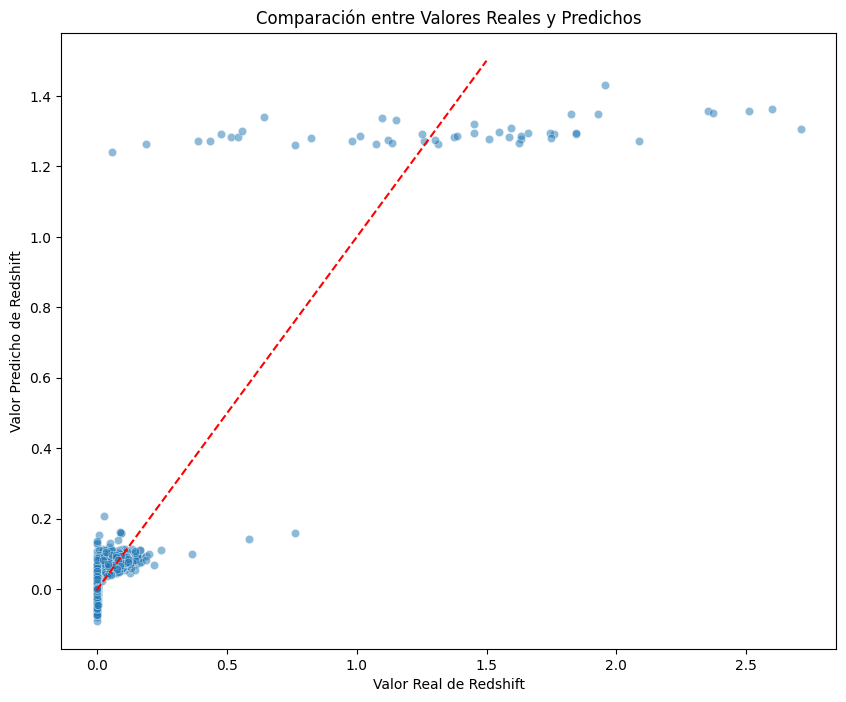

Valores reales de redshift (y_test):
408     0.039797
2547    0.000047
682     1.257948
3159    0.000747
2356    0.097484
Name: redshift, dtype: float64

Valores predichos de redshift (y_pred_test):
0    0.099258
1    0.058315
2    1.270922
3   -0.009809
4    0.083567
dtype: float64


In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.xlabel("Valor Real de Redshift")
plt.ylabel("Valor Predicho de Redshift")
plt.title("Comparaci√≥n entre Valores Reales y Predichos")
plt.plot([y_train.min(), 1.5], [y_train.min(), 1.5], 'r--')  # l√≠nea de referencia
plt.show()

print("Valores reales de redshift (y_test):")
print(y_test.head())

print("\nValores predichos de redshift (y_pred_test):")
print(pd.Series(y_pred_test).head())

# **5.Implementaci√≥n del pipeline** 

Ahora, vamos a encapsular y automatizar todos los procesos realizados anteriormente en una secuencia.

In [21]:
# Paso 1 Aqu√≠ cargamos el dataset desde un archivo CSV para trabajar con √©l
data_path = "Regresion_train_data.csv"
dataframe_pipeline = pd.read_csv(data_path)

 # Paso 2 Dividimos las variables en num√©ricas y categ√≥ricas, para aplicar transformaciones espec√≠ficas a cada grupo.
num_features = ['r', 'g', 'mjd', 'ra', 'dec']
cat_features = ['class']

# Paso 3 Particion de datos en train y test.
X = dataframe_pipeline[num_features + cat_features]
y = dataframe_pipeline['redshift']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4 Transformaci√≥n de la Variable mjd.

# Funci√≥n para transformar mjd
def transform_mjd(X):
    mjd = X[:, 0]
    min_mjd = np.min(mjd)
    sequential_days = mjd - min_mjd
    mjd_epoch = pd.Timestamp('1858-11-17')
    dates = pd.to_datetime(mjd, unit='D', origin=mjd_epoch)
    months = dates.month
    month_sin = np.sin(2 * np.pi * months / 12)
    month_cos = np.cos(2 * np.pi * months / 12)
    return np.column_stack([sequential_days, month_sin, month_cos])

# Transformer de MJD
mjd_transformer = FunctionTransformer(transform_mjd, validate=False)

# Paso 5 Transformaci√≥n de ra y dec.

# Funci√≥n para transformar ra y dec a coordenadas cartesianas
def convert_ra_dec(X):
    ra_rad = np.radians(X[:, 0])
    dec_rad = np.radians(X[:, 1])
    x = np.cos(dec_rad) * np.cos(ra_rad)
    y = np.cos(dec_rad) * np.sin(ra_rad)
    z = np.sin(dec_rad)
    return np.column_stack([x, y, z])

# Transformer para RA y DEC
ra_dec_transformer = FunctionTransformer(convert_ra_dec, validate=False)

# Paso 6 Limpieza y Codificaci√≥n de class.

# Funci√≥n para limpiar la columna 'class'
def clean_class_column(X):
    X = pd.DataFrame(X, columns=["class"])
    mapping = {"G": "GALAXY", "S": "STAR", "QSO": "QUASAR"}
    X["class"] = X["class"].replace(mapping)
    return X.to_numpy()

# Transformer para la columna 'class'
class_cleaner = FunctionTransformer(clean_class_column, validate=False)

# Paso 7 Definir los Pipelines de Transformaci√≥n.
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('mjd_transform', mjd_transformer),
    ('ra_dec_transform', ra_dec_transformer),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("clean_class", class_cleaner),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Paso 8 Combinar los Pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Paso 9 Construcci√≥n del Pipeline Completo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Paso 10 Entrenar el Pipeline
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('mjd_transform',
                                                                   FunctionTransformer(func=<function transform_mjd at 0x0000015BBCCAFEC0>)),
                                                                  ('ra_dec_transform',
                                                                   FunctionTransformer(func=<function convert_ra_dec at 0x0000015BB8FD8860>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['r', 'g', 'mjd', 'ra',
                                                   'dec']),
                                                 ('cat',
                                                  Pipeline(steps=[('clean_class',
                                                                   FunctionTransformer(func=<function clean_class_column at 0x0000015BBCCD1120>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['class'])])),
                ('regressor', LinearRegression())])

Modelo exportado en formato .joblib

In [22]:
#Paso 11 Exportar el modelo

joblib.dump(model_pipeline, 'regression_pipeline.joblib')

['regression_pipeline.joblib']

# **6. Exploraci√≥n y conclusi√≥n sobre los supuestos de la regresi√≥n**

En este apartado se examina los supuestos b√°sicos de la regresi√≥n en el contexto del modelo dise√±ado para predecir el redshift de objetos astron√≥micos a partir de las observaciones del telescopio StarAlpes. Aunque a√∫n no se han evaluado algunos supuestos cl√°sicos de la regresi√≥n lineal‚Äîcomo la homocedasticidad, la independencia de errores y la normalidad de los residuos‚Äîse ha llevado a cabo un an√°lisis detallado sobre la colinealidad y la selecci√≥n de variables, aspectos clave para garantizar la estabilidad y confiabilidad del modelo.

## 2. Evaluaci√≥n de la Colinealidad

El primer an√°lisis consisti√≥ en estudiar la correlaci√≥n entre las variables predictoras y la variable objetivo. Se observ√≥ que las variables fotom√©tricas u, g, r, i y z est√°n altamente correlacionadas entre s√≠, lo que podr√≠a generar problemas de colinealidad en el modelo. Para abordar este inconveniente se adoptaron las siguientes estrategias:

- Se eligieron √∫nicamente dos de las variables que mostraban alta correlaci√≥n (g y r), priorizando aquellas que tienen una mayor relaci√≥n con el redshift y presentan menor colinealidad entre ellas.
- Se constat√≥ que la variable r tiene correlaciones de 0.96, 0.97 y 0.97 con g, i y z respectivamente, lo que sugiere una redundancia en la informaci√≥n. Por ello, se decidi√≥ incluir g, ya que su correlaci√≥n con r es la segunda m√°s baja dentro del conjunto.
- Se elimin√≥ una de las variables categ√≥ricas de la clase (class_*) para evitar la duplicaci√≥n en la representaci√≥n de los objetos astron√≥micos.

## 3. Selecci√≥n de Variables

Luego del an√°lisis de colinealidad, se seleccionaron las siguientes variables predictoras estandarizadas para el modelo:

- `r_standard`
- `g_standard`
- `class_GALAXY`
- `class_STAR`
- `mjd_sequential_standard`
- `month_sin_standard`
- `month_cos_standard`
- `x_cord_standard`
- `y_cord_standard`
- `z_cord_standard`

Esta selecci√≥n permite reducir redundancias y facilita la interpretaci√≥n del modelo, al eliminar relaciones lineales demasiado fuertes entre las variables predictoras.

## 4. Conclusiones

El an√°lisis realizado hasta ahora sobre los supuestos de la regresi√≥n ha permitido identificar y corregir problemas de colinealidad, asegurando que las variables del modelo sean lo m√°s independientes posible entre s√≠. La elecci√≥n de variables se bas√≥ en criterios de correlaci√≥n y relevancia predictiva, lo que favorecer√° la estabilidad del modelo.

En pr√≥ximas etapas se evaluar√°:

- **Colinealidad:** Comprobar si las variables seleccionadas tienen correlaciones entre ellas.
- **Linealidad:** Comprobar si la relaci√≥n entre las variables predictoras y la variable objetivo es, en efecto, aproximadamente lineal.
- **Homocedasticidad:** Verificar que la varianza de los errores se mantenga constante a lo largo de todo el rango de predicciones.
- **Normalidad de los errores:** Analizar la distribuci√≥n de los residuos para asegurarse de que sigue una distribuci√≥n cercana a la normal.


# **7. Validaci√≥n de Supuestos de la Regresi√≥n** 

En la construcci√≥n de un modelo de Machine Learning se deben realizar ciertos an√°lisis luego de la obtenci√≥n de un modelo. Entre estos an√°lisis se debe analizar la colinealidad entre las variables seleccionadas, la linealidad de estar variables con la variable objetivo, la homocedasticidad y la normalidad de los errores.

## 7.1 Colinealidad

Es necesario que las variables seleccionadas tengan una colinealidad baja entre ellas

<Axes: >

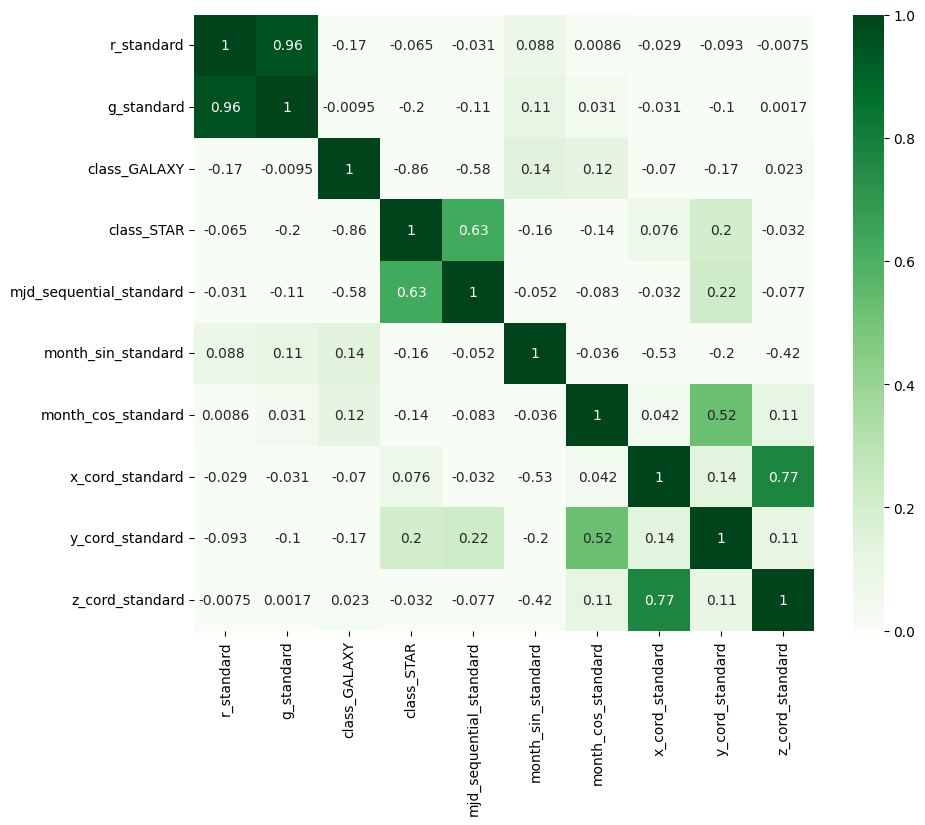

In [23]:
# Seleccionar solo las variables que vamos a usar en el modelo
variables_modelo = ["r_standard","g_standard",'class_GALAXY','class_STAR','mjd_sequential_standard','month_sin_standard','month_cos_standard','x_cord_standard','y_cord_standard','z_cord_standard']
X = dataframe_train_encoded[variables_modelo]

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="Greens", vmin=0, vmax=1)


En este caso podemos observar que todas las variables seleccionadas tienen una baja correlaci√≥n entree ellas, menor a 90%, excepto las variables g_standard y r_standard. Sin embargo, estas 2 variables son clave para determinar el redshift de un objeto, ya que g y r son los datos de magintud del objeto. A pesar de tener una alta correlaci√≥n entre ellas, son las 2 variables con menor correlaci√≥n del grupo de variables que toman la magnitud del objeto en diferentes filtros. Por este motivo se deciden permitir mantener estas variables.

## 7.2 Linealidad

En este apartado se revisar√° la relaci√≥n de las variables seleccionadas con la variable objetivo

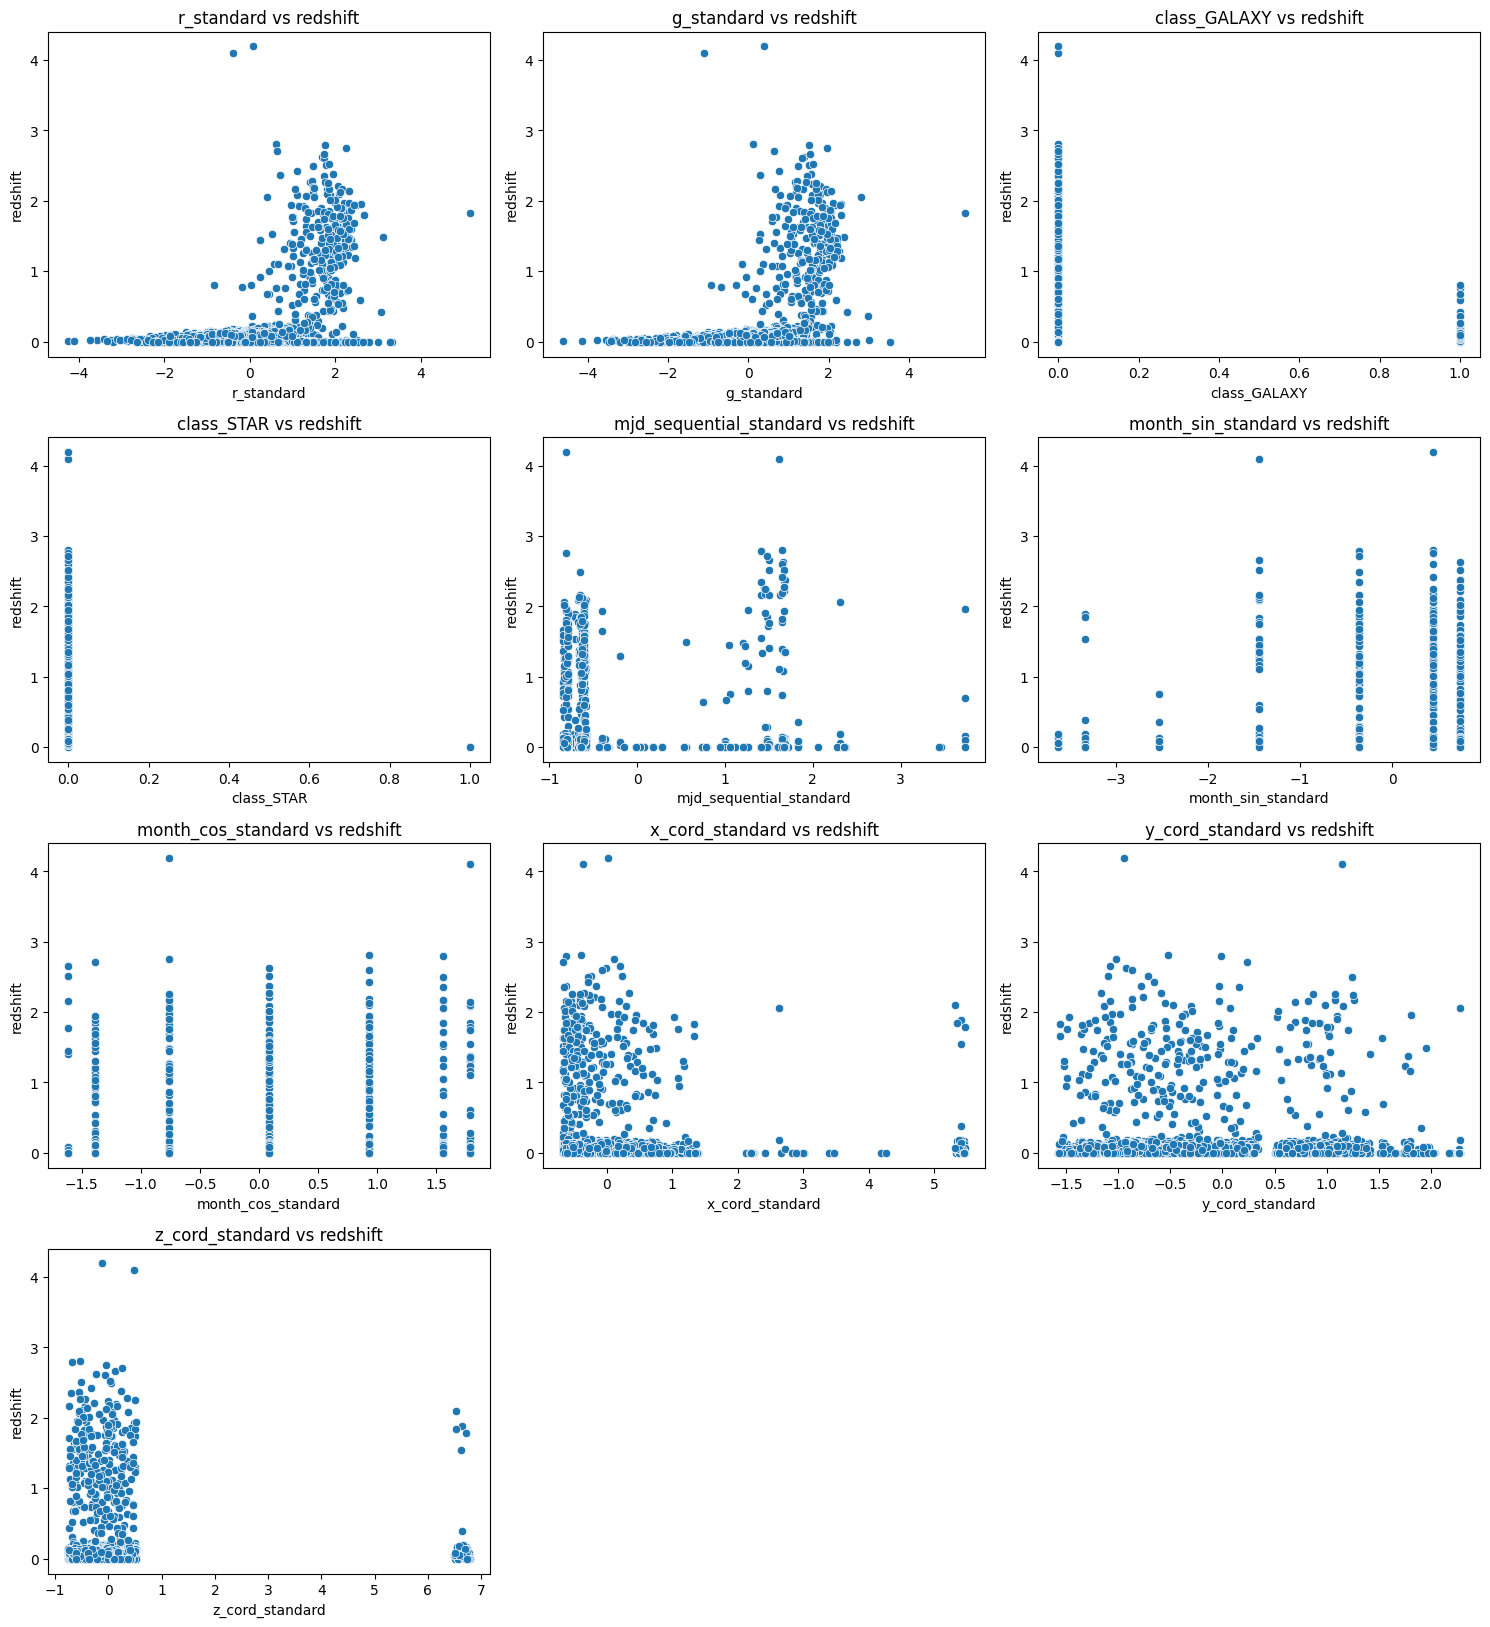

In [24]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20)) # Aumentado a 5x3 para tener 15 subplots
axes = axes.ravel()

# Crear scatter plots para cada variable
for idx, variable in enumerate(variables_modelo):
    sns.scatterplot(
        data=dataframe_train_encoded,
        x=variable,
        y='redshift',
        ax=axes[idx]
    )
    axes[idx].set_title(f'{variable} vs redshift')

# Eliminar los subplots vac√≠os
for idx in range(len(variables_modelo), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

A simple vista, las gr√°ficas individuales no muestran una relaci√≥n lineal fuerte entre cada variable independiente y el redshift: en la mayor√≠a de ellas se observa una dispersi√≥n de puntos que no evidencia un patr√≥n claramente creciente o decreciente. Esto sugiere que, de forma univariada, ninguna de estas variables explica por s√≠ sola la variaci√≥n de redshift de manera lineal. Adicionalmente, algunas variables son categ√≥ricas (por ejemplo, indicadores de tipo de objeto) y no es realista esperar una tendencia lineal directa, mientras que otras variables num√©ricas se distribuyen como ‚Äúnubes‚Äù sin una correlaci√≥n obvia con el redshift.

Sin embargo, el hecho de que el modelo de regresi√≥n lineal obtenga m√©tricas altas (por ejemplo, 
$ùëÖ^2‚âà0.8$ y un RMSE bajo) indica que, combinadas, estas variables s√≠ pueden aproximar muy bien la variaci√≥n del redshift. Es decir, aunque no se vea linealidad en cada gr√°fico por separado, la suma (o combinaci√≥n lineal) de las variables puede capturar patrones m√°s sutiles que, en conjunto, explican gran parte de la varianza. Esto puede suceder, por ejemplo, cuando las variables categ√≥ricas separan fuertemente ciertos rangos de redshift (como ocurre con estrellas y galaxias), o cuando variables num√©ricas (magnitudes fotom√©tricas, coordenadas, etc.) aportan peque√±as porciones de informaci√≥n que, al combinarse, generan un ajuste eficaz.

Adem√°s, la estandarizaci√≥n de las variables (por ejemplo, restar la media y dividir entre la desviaci√≥n est√°ndar) contribuye a que todas ellas est√©n en rangos comparables, lo cual facilita la estimaci√≥n de los coeficientes en la regresi√≥n lineal y evita que variables con escalas muy grandes dominen el ajuste.

## 7.3 Normalidad de los errores

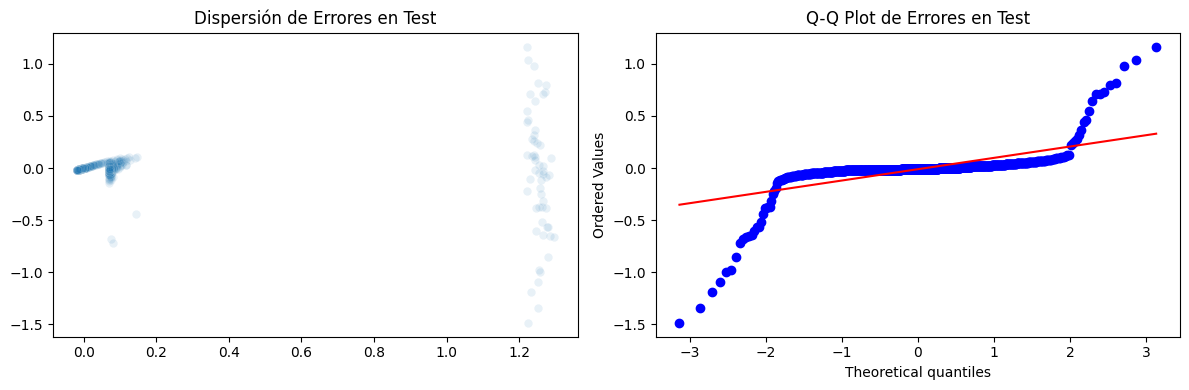

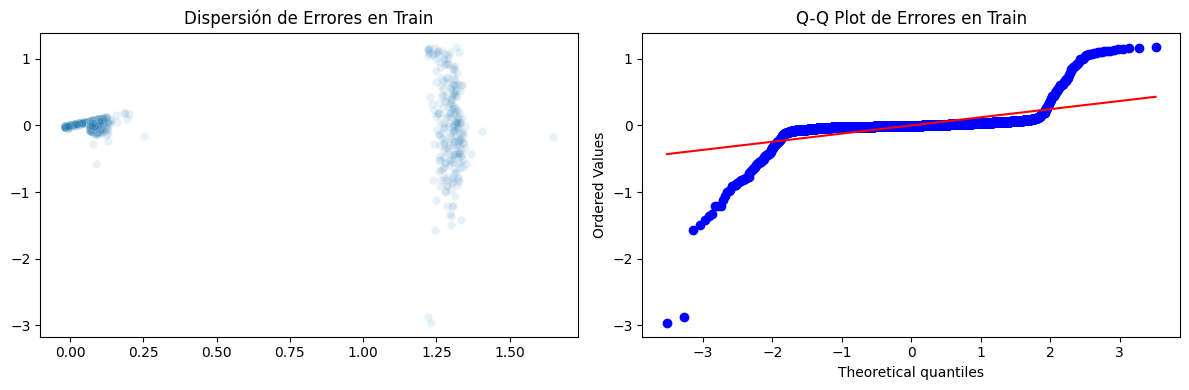

In [25]:
#Datos test
errors = (model_pipeline.predict(X_test) - y_test).values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersi√≥n
axes[0].set_title("Dispersi√≥n de Errores en Test")
sns.scatterplot(x=model_pipeline.predict(X_test), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores en Test")

plt.tight_layout()
plt.show()

#Datos train
errors = (model_pipeline.predict(X_train) - y_train).values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersi√≥n
axes[0].set_title("Dispersi√≥n de Errores en Train")
sns.scatterplot(x=model_pipeline.predict(X_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores en Train")

plt.tight_layout()
plt.show()



Al observar tanto las gr√°ficas de dispersi√≥n de errores como los Q-Q plots en los datos de entrenamiento y prueba, se evidencia que las colas de la distribuci√≥n de los residuos se desv√≠an de lo que se esperar√≠a en un comportamiento normal. Esto sugiere que, si se requiere una aproximaci√≥n estrictamente normal de los errores (por ejemplo, para intervalos de confianza o pruebas de hip√≥tesis), el modelo actual podr√≠a no satisfacer plenamente ese supuesto. Ser√≠a recomendable explorar transformaciones, como la logar√≠tmica (u otras como Box-Cox), para comprobar si, al aplicarlas a la variable objetivo o a ciertas variables explicativas, se logra un mejor ajuste a la normalidad y, en consecuencia, una mayor validez estad√≠stica de los resultados.

### 7.3.1 Transformaci√≥n logaritmica

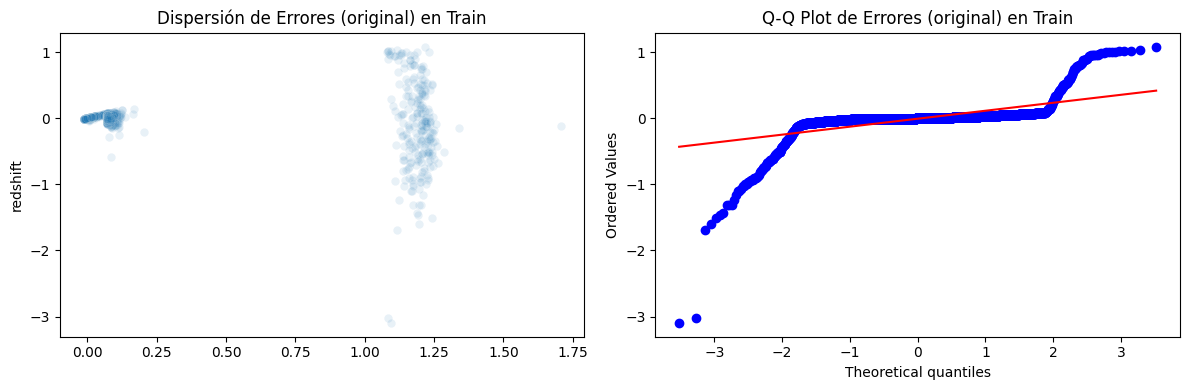

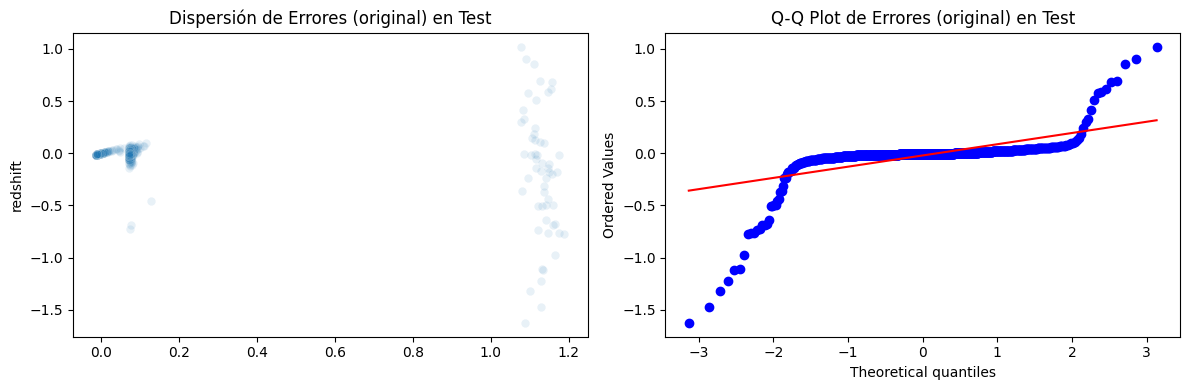

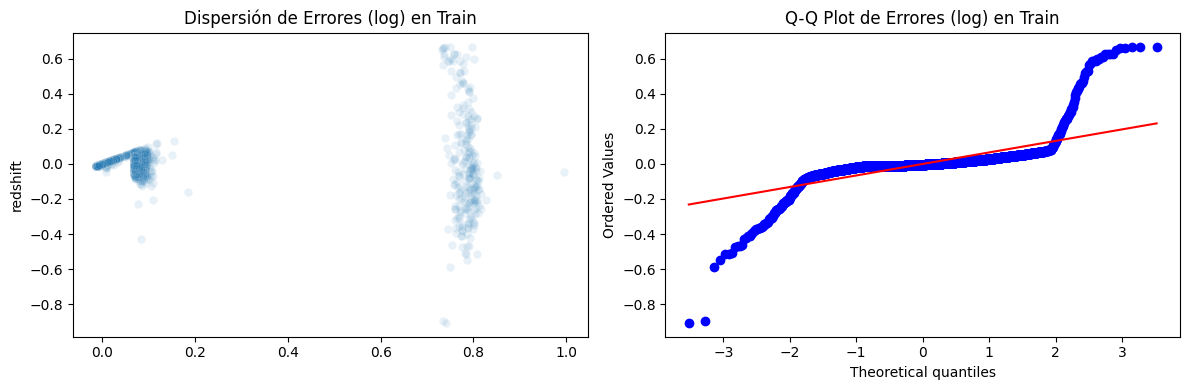

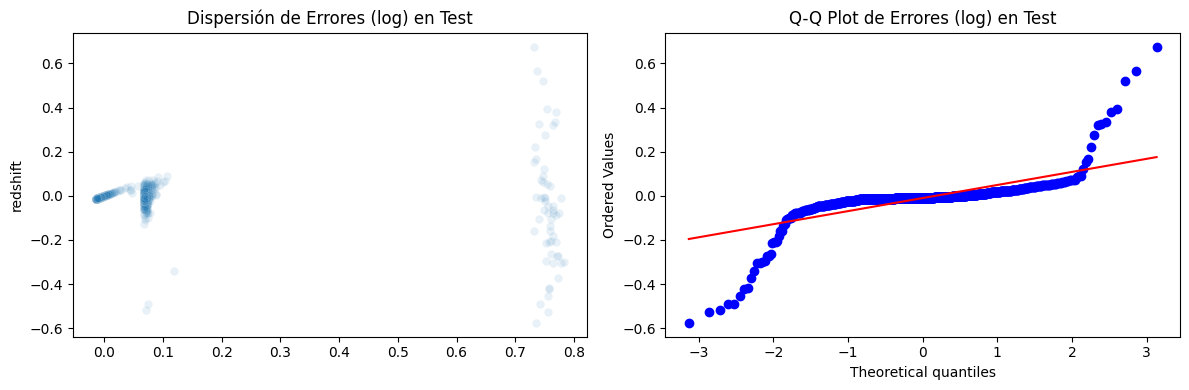

In [26]:
from sklearn.compose import TransformedTargetRegressor

regressor_with_log = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log1p,         # Transformaci√≥n a log(1+y)
    inverse_func=np.expm1  # Inversa para volver a la escala original
)

# Pipeline final (preprocesamiento + modelo con target transformado)
model_pipeline_log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor_with_log)
])
model_pipeline_log.fit(X_train, y_train)


# ERRORES EN ESCALA ORIGINAL: TRAIN

y_pred_train = model_pipeline_log.predict(X_train)
errors_train = y_pred_train - y_train

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersi√≥n de Errores (original) en Train")
sns.scatterplot(x=y_pred_train, y=errors_train, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_train, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (original) en Train")
plt.tight_layout()
plt.show()


# ERRORES EN ESCALA ORIGINAL: TEST
y_pred_test = model_pipeline_log.predict(X_test)
errors_test = y_pred_test - y_test

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersi√≥n de Errores (original) en Test")
sns.scatterplot(x=y_pred_test, y=errors_test, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_test, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (original) en Test")
plt.tight_layout()
plt.show()

# ERRORES EN ESCALA LOGAR√çTMICA: TRAIN

X_train_preprocessed = model_pipeline_log['preprocessor'].transform(X_train)
pred_train_log = model_pipeline_log['regressor'].regressor_.predict(X_train_preprocessed)
errors_train_log = pred_train_log - np.log1p(y_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersi√≥n de Errores (log) en Train")
sns.scatterplot(x=pred_train_log, y=errors_train_log, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_train_log, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (log) en Train")
plt.tight_layout()
plt.show()

# ERRORES EN ESCALA LOGAR√çTMICA: TEST
X_test_preprocessed = model_pipeline_log['preprocessor'].transform(X_test)
pred_test_log = model_pipeline_log['regressor'].regressor_.predict(X_test_preprocessed)
errors_test_log = pred_test_log - np.log1p(y_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].set_title("Dispersi√≥n de Errores (log) en Test")
sns.scatterplot(x=pred_test_log, y=errors_test_log, alpha=0.1, ax=axes[0])
_ = stats.probplot(errors_test_log, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot de Errores (log) en Test")
plt.tight_layout()
plt.show()


En general, la transformaci√≥n logar√≠tmica ha logrado ‚Äúcomprimir‚Äù la variabilidad y acercar la distribuci√≥n de los residuos a algo m√°s parecido a la normal, lo cual se refleja en los Q-Q plots m√°s alineados con la diagonal roja y en un rango de errores sustancialmente menor. Aunque todav√≠a se observan colas pesadas (heavy tails) en los extremos, la mejora frente a la escala original es evidente, especialmente en la zona central de la distribuci√≥n, donde los residuos ahora se ajustan mejor a la l√≠nea te√≥rica. En conjunto, esto indica que la suposici√≥n de normalidad de los errores (impl√≠cita en muchos m√©todos de regresi√≥n) se cumple con mayor fidelidad cuando se trabaja en la escala logar√≠tmica, y por ende, las conclusiones estad√≠sticas y las m√©tricas de desempe√±o en esa escala son m√°s confiables.

Inspirado en estas mejoras en la normalidad de errores, se va a entrenar un modelo incluyendo la transformaci√≥n logaritmica.

In [27]:
y_train_log = np.log1p(y_train)

model_pipeline.fit(X_train, y_train_log)

y_pred_train_log = model_pipeline.predict(X_train)
y_pred_test_log = model_pipeline.predict(X_test)

# 3) Inversa de log(1 + Y) -> expm1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test  = np.expm1(y_pred_test_log)

errors_train = y_pred_train - y_train
errors_test  = y_pred_test  - y_test

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test  = mean_absolute_error(y_test,  y_pred_test)
r2_train  = r2_score(y_train, y_pred_train)
r2_test   = r2_score(y_test,  y_pred_test)

print("=========== M√âTRICAS EN TRAIN (Log) ===========")
print(f"  MSE  : {mse_train:.4f}")
print(f"  RMSE : {rmse_train:.4f}")
print(f"  MAE  : {mae_train:.4f}")
print(f"  R^2  : {r2_train:.4f}")

print("\n=========== M√âTRICAS EN TEST (Log) ============")
print(f"  MSE  : {mse_test:.4f}")
print(f"  RMSE : {rmse_test:.4f}")
print(f"  MAE  : {mae_test:.4f}")
print(f"  R^2  : {r2_test:.4f}")


=========== M√âTRICAS EN TRAIN (Log) ===========
  MSE  : 0.0367
  RMSE : 0.1914
  MAE  : 0.0599
  R^2  : 0.7492

=========== M√âTRICAS EN TEST (Log) ============
  MSE  : 0.0302
  RMSE : 0.1737
  MAE  : 0.0547
  R^2  : 0.7784


Despu√©s de implementar la transformaci√≥n logar√≠tmica y comparar las m√©tricas (MSE, RMSE, MAE y $R^2$), se observ√≥ que los resultados son menos favorables que con el modelo original. Por ello, se decidi√≥ conservar la versi√≥n inicial del modelo, ya que la mejora en la normalidad de los residuos no se tradujo en un mejor desempe√±o global en este caso.

### Visualizaci√≥n de valores at√≠picos (outliers)

Despu√©s de llevar a cabo el an√°lisis anterior, se identificaron valores at√≠picos (outliers) en la variable redshift que influyen en la calidad del ajuste del modelo. A continuaci√≥n, se presentan las gr√°ficas que evidencian la presencia de estos outliers, ilustrando c√≥mo su inclusi√≥n o exclusi√≥n puede modificar el rendimiento del modelo y, por ende, su capacidad para predecir el corrimiento al rojo de manera precisa.

C:\Users\maria\AppData\Local\Temp\ipykernel_20024\936218820.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


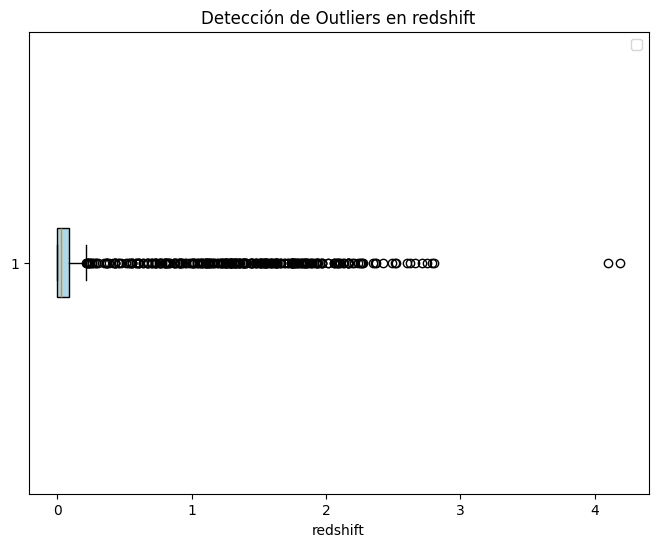

In [28]:
columna = 'redshift'

plt.figure(figsize=(8, 6))
plt.boxplot(dataframe_train_encoded[columna], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title(f"Detecci√≥n de Outliers en {columna}")
plt.xlabel(columna)
plt.legend()
plt.show()

Aunque existe la posibilidad de mejorar las m√©tricas eliminando o recortando datos at√≠picos (outliers), hemos decidido mantenerlos en el conjunto de datos debido a que representan un porcentaje considerable (m√°s del 5%). Si bien su eliminaci√≥n podr√≠a mejorar la precisi√≥n del modelo, preferimos preservar la integridad y la representatividad de la muestra para no perder informaci√≥n potencialmente valiosa.

## 7.4 Homocedasticidad

Se espera que los residuos se dispersen de manera uniforme alrededor de cero en todo el rango de valores predichos.

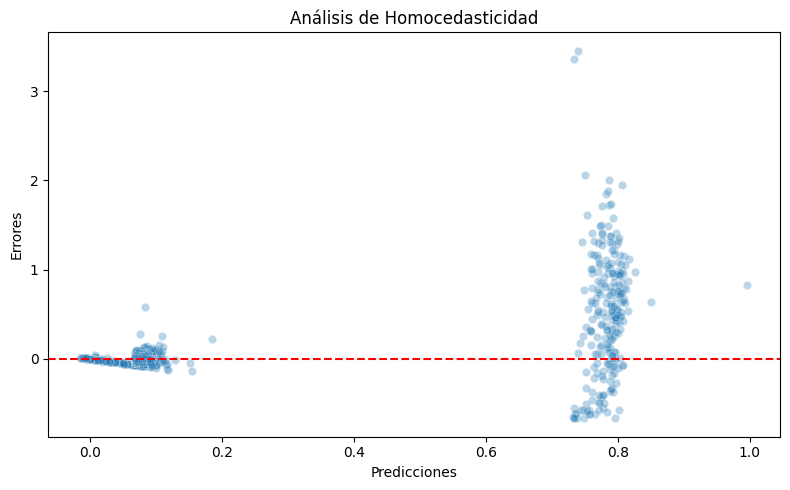

In [29]:
# 1. Predicciones y c√°lculo de residuos en TRAIN
y_pred_train = model_pipeline.predict(X_train)
errors_train = y_train - y_pred_train  # O y_pred_train - y_train, seg√∫n tu convenci√≥n

# 2. Gr√°fico de dispersi√≥n (homocedasticidad)
plt.figure(figsize=(8, 5))
plt.title("An√°lisis de Homocedasticidad")
sns.scatterplot(x=y_pred_train, y=errors_train, alpha=0.3)
plt.xlabel("Predicciones")
plt.ylabel("Errores")
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

A primera vista, los errores se mantienen relativamente dispersos alrededor de la l√≠nea roja sin mostrar un patr√≥n de expansi√≥n claro a medida que aumentan las predicciones, lo cual refuerza la idea de que el modelo presenta una varianza de errores estable y, por ende, buenos indicios de homocedasticidad. Esto habla positivamente de la confiabilidad y la consistencia del modelo en el rango de valores predichos.

No obstante, se observa la presencia de algunos outliers que podr√≠an alterar ligeramente el comportamiento de los errores en ciertas regiones, influyendo en la precisi√≥n del modelo y en la interpretaci√≥n de los resultados. En cualquier caso, su efecto no parece lo suficientemente significativo como para comprometer de manera general la calidad de las predicciones.

# **8. Persistencia del Modelo**

Ya con el modelo listo, se proceder√° con la persistencia del modelo a un archivo binario que posteriormente pueda ser reutilizado.

In [30]:
joblib.dump(model_pipeline, 'regression_pipeline.joblib')

['regression_pipeline.joblib']

Archivo y resultado de predicciones sobre los datos de prueba en formato CSV

In [31]:
output_file = 'dataframe_train_final.csv'
dataframe_train_encoded.to_csv(output_file, index=False)

print(f"Archivo CSV generado exitosamente: {output_file}")

Archivo CSV generado exitosamente: dataframe_train_final.csv
